# Regresión Logística

In [52]:
import pandas as pd

In [53]:
# Cargar datos. Vamos a utilizar el conjunto de datos de flores Iris:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# El parámetro header=None se utiliza para indicar que el conjunto de datos no tiene una fila de encabezado en el archivo CSV

# Pandas asigna nombres de columna predeterminados (0, 1, 2, etc.) a cada columna. Renombramos:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
iris["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

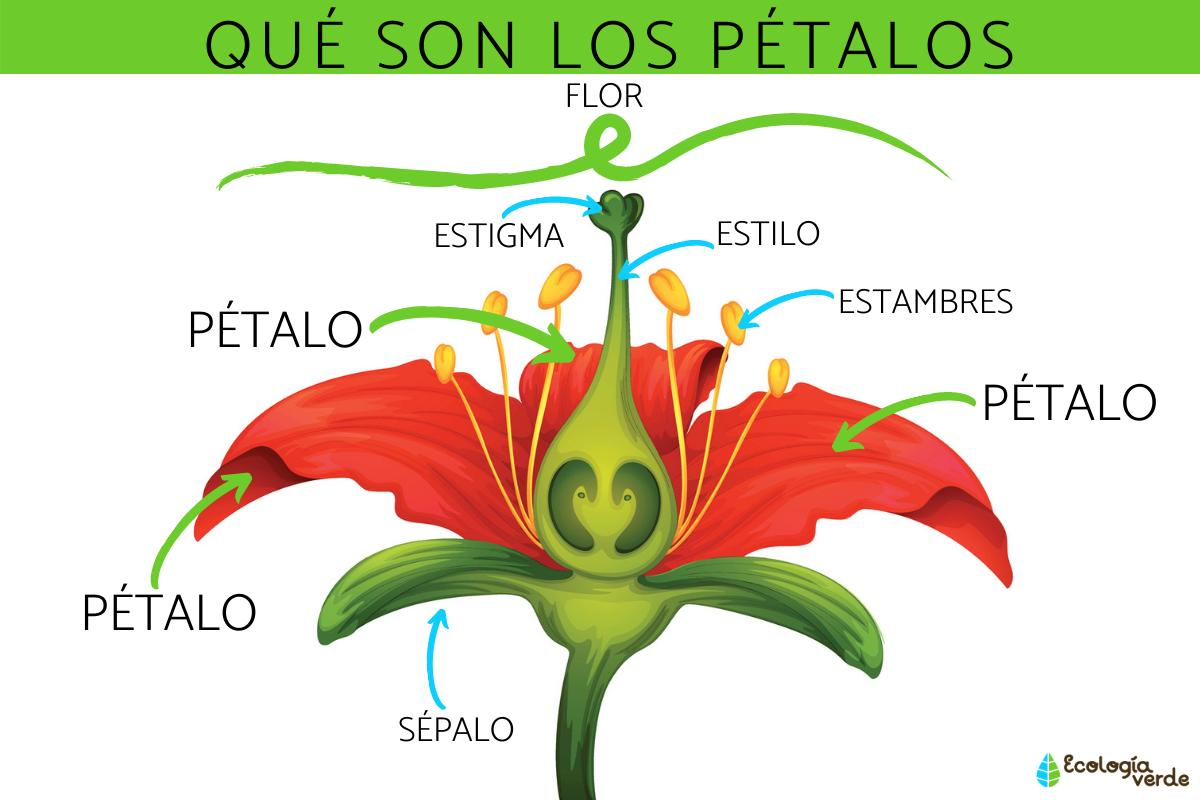

El sépalo y el pétalo son dos de las partes que componen la flor de una planta.

El **sépalo** es la parte más externa de la flor, que rodea y protege los pétalos, los estambres y los pistilos en desarrollo. El sépalo suele estar compuesto por varias hojas de aspecto similar y puede ser de diferentes colores y formas, dependiendo de la especie de la planta.

Los **pétalos** son las estructuras coloridas y a menudo llamativas que se encuentran en el centro de la flor, rodeando los órganos reproductivos de la planta. Los pétalos pueden tener diferentes formas y tamaños, y su colorido y patrón a menudo son importantes para atraer a los polinizadores, como las abejas, las mariposas y los colibríes.

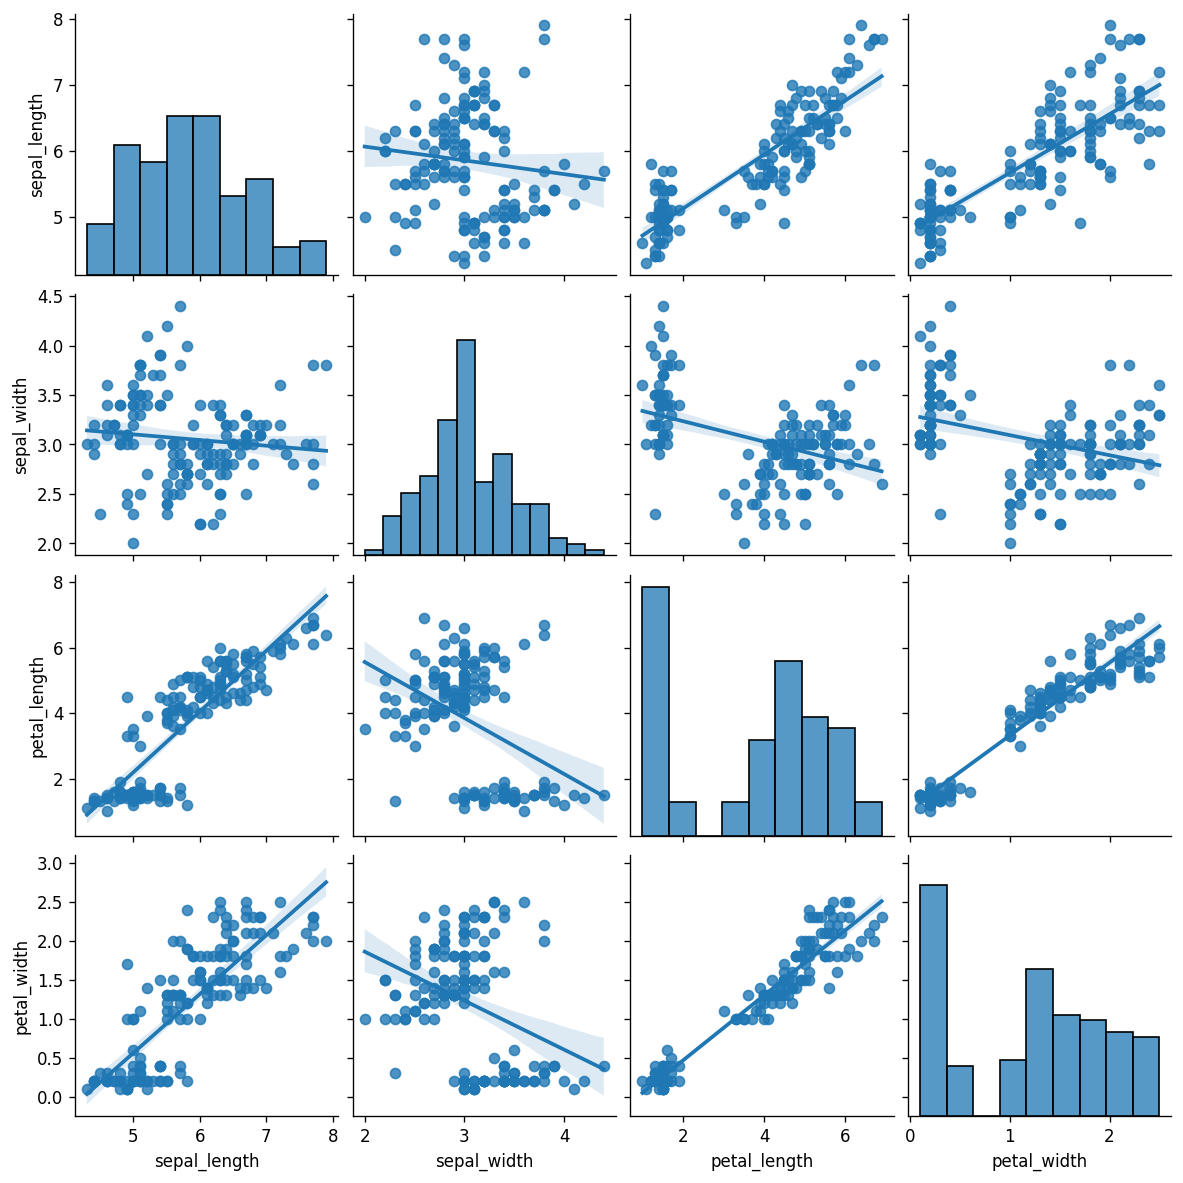

In [55]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import seaborn as sns

sns.pairplot(iris, kind="reg")
plt.show()

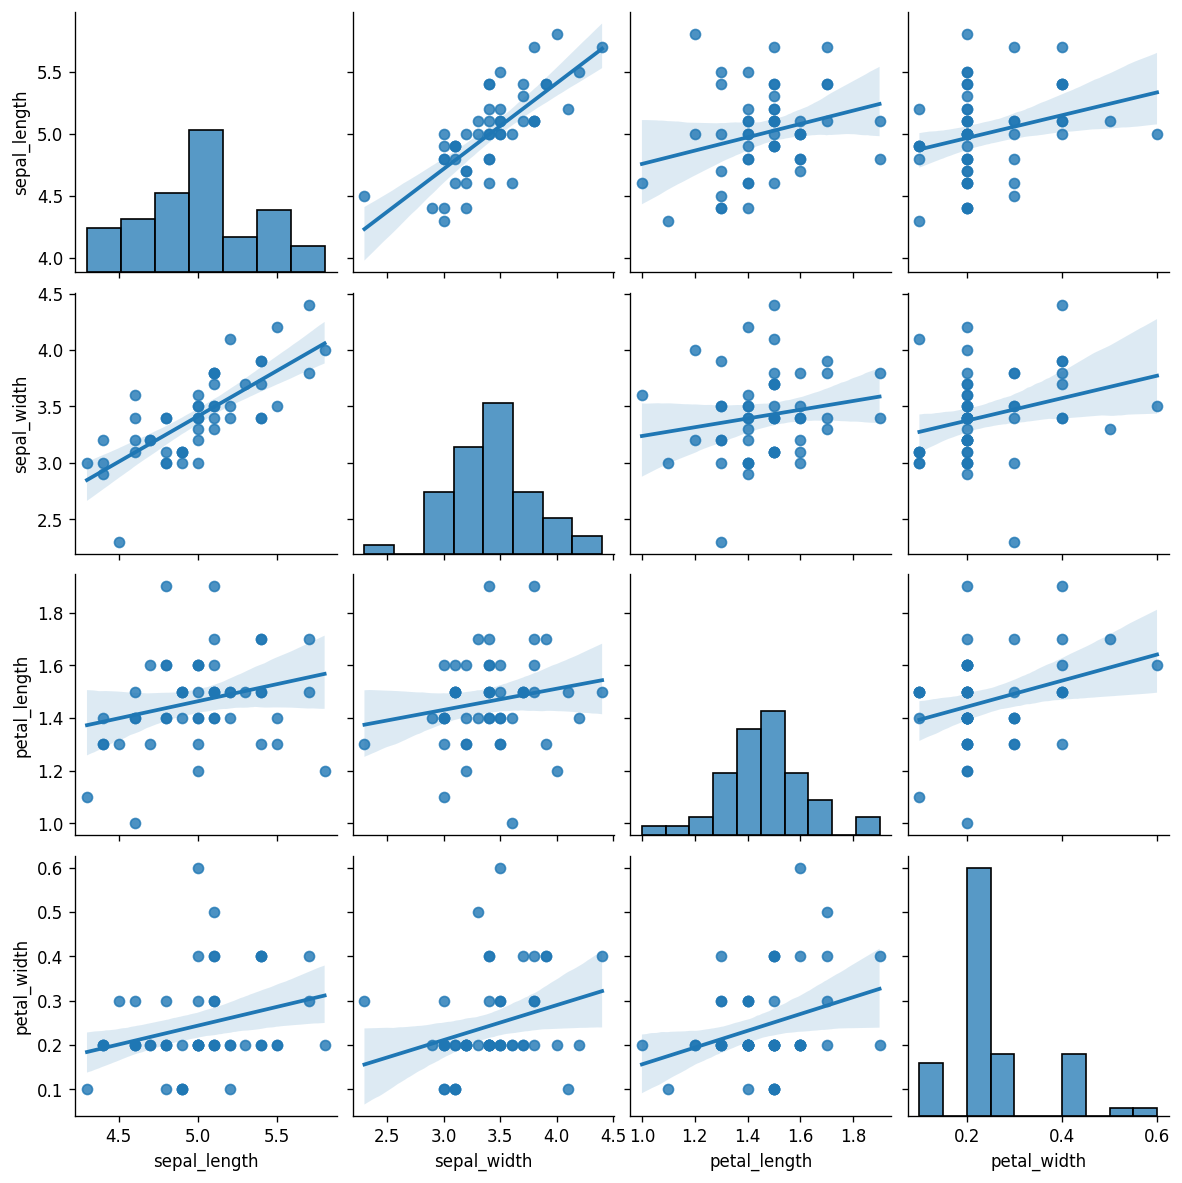

In [56]:
# Iris-setosa        50
# Iris-versicolor    50
# Iris-virginica     50
sns.pairplot(iris[iris["class"] == "Iris-setosa"], kind="reg")
plt.show()

Las características de las flores están representadas por la longitud y el ancho del sépalo y los pétalos, y la clase de la flor es la variable de destino.

Por tanto, el objetivo de la regresión logística es predecir el tipo de flor (clase, variable dependiente) en función de sus características físicas (variables independientes).

In [57]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = iris.iloc[:, :-1] # todos los datos excepto la última columna
y = iris.iloc[:, -1] # sólo la última columna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [60]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [61]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [62]:
y_train

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: class, Length: 105, dtype: object

In [63]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
43         

## Crear el modelo de regresión logística

#### y ajustarlo a los datos de entrenamiento

In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = logreg.predict(X_test)
print('Precisión del modelo: {:.2f}'.format(logreg.score(X_test, y_test)))

Precisión del modelo: 0.98


In [66]:
# Sacamos por pantalla los datos de test, junto con la predicción, los resultados esperados y booleano de acierto
df = X_test
df["prediccion"] = y_pred
df["real"] = y[X_test.index]
df["acierto"] = (df["prediccion"] == df["real"])

df

,sepal_length,sepal_width,petal_length,petal_width,prediccion,real,acierto
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica,True
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor,True
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa,True
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica,True
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa,True
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica,True
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,True
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,True
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor,True
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor,True


## Ejercicio

Realizar similar análisis con la misma fuente de datos utilizando KNN para realizar la clasificación del conjunto de test. Comparar precisión (score) de ambos modelos.